# Data Reply - QMU ML Challenge
## Introduction

In this challenge, you will be using US census data to predict whether or not a person earns over $50k a year.
This challenge takes you through the data science process of Data Loading, Data Exploration & Cleansing, Feature Generation, Model Calibration and Model Evaluation. You will build different models to tackle this classification problem, evaluating your models along the way, and finally combining each of your models into your own ensemble classifier.

---

### The DS process

There are 5 main steps in the data science process. 

1. Data loading. 
2. Data exploration and clensing. 
3. Feature generation.
4. Model calibration.
5. Model evaluation.

The majority of a data scientists time is spend on number 2. Exploration and clensing are a very important step in the data science process with data scientists typically spending 80% of their time preparing the data.

We will be following this process to demonstrate how ML projects are developped. 

---

### 1. Data Loading

In this example, we are using a relatively small and static dataset - so the data loading process is straight forward. 

In real-life projects, the data:
 - is sometimes dynamic - updated regularly, or streaming into the data storage system in real time
 - is often very large - 100s of GBs of TBs
 - is ALWAYS dirty, and needs cleaning

In these cases, some specialised big data or streaming tools may be needed to develop the solution, such as spark, kafke, etc. But, for this example, we will consider this static dataset.

In [1]:
import numpy as np
import pandas as pd
import sklearn
from zipfile import ZipFile

Read the data into a dataframe using pandas, passing the argument names = [...] into the read_csv function to set the column names.

In [2]:
zip_file = ZipFile('census_data.zip')
df = pd.read_csv(zip_file.open('census_data.csv'))

We can inspect a sample of the dataframe by using the df.head( ) function. 

In [3]:
df.head(n=5)

,age,class_of_worker,education,wage_per_hour,marital_status,major_industry_code,major_occupation_code,race,sex,full_or_part_time_employment_stat,...,live_in_this_house_1_year_ago,family_members_under,total_person_earnings,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,weeks_worked,earn_over_50k
0,73,Not in universe,High school graduate,0,Widowed,Not in universe or children,Not in universe,White,Female,Not in labor force,...,Not in universe under 1 year old,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,-50000
1,58,Self-employed-not incorporated,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,Male,Children or Armed Forces,...,No,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,52,-50000
2,18,Not in universe,10th grade,0,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,Female,Not in labor force,...,Not in universe under 1 year old,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,Not in universe,0,-50000
3,9,Not in universe,Children,0,Never married,Not in universe or children,Not in universe,White,Female,Children or Armed Forces,...,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,-50000
4,10,Not in universe,Children,0,Never married,Not in universe or children,Not in universe,White,Female,Children or Armed Forces,...,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,-50000


You will notice that some of the columns are obscured from view. This is a default setting and can be overwritten using the following command. 

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [5]:
df.head(n=5)

,age,class_of_worker,education,wage_per_hour,marital_status,major_industry_code,major_occupation_code,race,sex,full_or_part_time_employment_stat,capital_gains,capital_losses,divdends_from_stocks,live_in_this_house_1_year_ago,family_members_under,total_person_earnings,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,weeks_worked,earn_over_50k
0,73,Not in universe,High school graduate,0,Widowed,Not in universe or children,Not in universe,White,Female,Not in labor force,0,0,0,Not in universe under 1 year old,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,-50000
1,58,Self-employed-not incorporated,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,Male,Children or Armed Forces,0,0,0,No,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,52,-50000
2,18,Not in universe,10th grade,0,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,Female,Not in labor force,0,0,0,Not in universe under 1 year old,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,Not in universe,0,-50000
3,9,Not in universe,Children,0,Never married,Not in universe or children,Not in universe,White,Female,Children or Armed Forces,0,0,0,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,-50000
4,10,Not in universe,Children,0,Never married,Not in universe or children,Not in universe,White,Female,Children or Armed Forces,0,0,0,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,-50000


---
### 2. Data Exploration & Clensing

Now that the data is loaded into a dataframe, we can look at some summary statistics of numerical columns to give us a first idea of the data.

In [6]:
df.describe()

,age,wage_per_hour,capital_gains,capital_losses,divdends_from_stocks,family_members_under,weeks_worked
count,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,55.426908,434.71899,37.313788,197.529533,1.956180,23.174897
std,22.310895,274.896454,4697.53128,271.896428,1984.163658,2.365126,24.411488
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.00000,0.000000,0.000000,1.000000,8.000000
75%,50.000000,0.000000,0.00000,0.000000,0.000000,4.000000,52.000000
max,90.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,52.000000


---
Different features of the data may need different preprocessing steps. For example, "sex" might be encoded to 0 and 1 to represent male and female\*, but doing this with "wage_per_hour" - a continuous data type - wouldn't make sense.

\**NOTE: the US census dataset used here uses biological "sex", for which there were 2 options (male and female), as opposed to gender where may be more.*

There are 4 different 'types' of feature which may be present in the data: nominal, ordinal, interval and ratio. Each of these should be dealt with in different ways. [This website](https://www.graphpad.com/support/faq/what-is-the-difference-between-ordinal-interval-and-ratio-variables-why-should-i-care/) gives some more context on these different feature types. 

From these definitions, we can see that "sex" is obviously a nominal feature. If there are other nominal features in the dataset, it might be useful to create some kind of function which can be applied to each nominal column - then also for each ordinal, interval and ratio columns. To do this we shall make use of sklearn's transformers - more on these later. 

But first, we need to determine which features belong to each of these categories. 

We can inspect the columns and their datatypes by running df.dtypes in the next cell. 

In [14]:
df.dtypes

age                                   int64
class_of_worker                      object
education                            object
wage_per_hour                         int64
marital_status                       object
major_industry_code                  object
major_occupation_code                object
race                                 object
sex                                  object
full_or_part_time_employment_stat    object
capital_gains                         int64
capital_losses                        int64
divdends_from_stocks                  int64
live_in_this_house_1_year_ago        object
family_members_under                  int64
total_person_earnings                object
country_of_birth_father              object
country_of_birth_mother              object
country_of_birth_self                object
citizenship                          object
own_business_or_self_employed        object
weeks_worked                          int64
earn_over_50k                   

In [15]:
df.dtypes[0]

dtype('int64')

In [16]:
type(df.dtypes)

pandas.core.series.Series

---
As we can see, our features are either int64, or object datatypes. (Here, object can be thought of as string.)

Inspecting columns of each datatype in turn might be a good place to start when determining which columns are nominal, etc. 
Remember though, ALL DATA IS DIRTY. 
Columns may need to be changed from one datatype to another, this is just a starting point.


Complete the function in the next cell to return a list of all columns from a dataframe of a given datatype.

In [8]:
def get_cols_of_type(input_df, data_type):
    '''
    Takes a dataframe and dtype, eg. string, and returns a list of columns names of that dtype.
    '''
    output_list = []
    # fill in logic here.
    for i in range(len(input_df.columns)): # del
        if input_df.dtypes[i]==data_type: # del
            output_list.append(input_df.columns[i]) # del
            
    return output_list


In [9]:
# display int datatypes from our dataframe
get_cols_of_type(df, int)

['age',
 'wage_per_hour',
 'capital_gains',
 'capital_losses',
 'divdends_from_stocks',
 'family_members_under',
 'weeks_worked']

In [10]:
# display object datatypes from our dataframe
get_cols_of_type(df, object)

['class_of_worker',
 'education',
 'marital_status',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'sex',
 'full_or_part_time_employment_stat',
 'live_in_this_house_1_year_ago',
 'total_person_earnings',
 'country_of_birth_father',
 'country_of_birth_mother',
 'country_of_birth_self',
 'citizenship',
 'own_business_or_self_employed',
 'earn_over_50k']

---
Now let's go through each column and decide which category each belongs to. Then we can deal with each feature type in turn by passing our list of columns into our transformer function. 

**Remember** - earn_over_50k will be our target variable, so we want to keep that separate.

In [19]:
sorted(df.total_person_earnings.unique())

['Both parents present',
 'Father only present',
 'Mother only present',
 'Neither parent present',
 'Not in universe']

In [11]:
nominal_cols = ['class_of_worker',
                 'marital_status',
                 'major_industry_code',
                 'major_occupation_code',
                 'race',
                 'sex',
                 'full_or_part_time_employment_stat',
                 'live_in_this_house_1_year_ago',
                 'total_person_earnings',
                 'country_of_birth_father',
                 'country_of_birth_mother',
                 'country_of_birth_self',
                 'citizenship',
                 'own_business_or_self_employed']

ordinal_cols = ["education"]

interval_cols = []

ratio_cols = ['age',
             'wage_per_hour',
             'capital_gains',
             'capital_losses',
             'divdends_from_stocks',
             'family_members_under',
             'weeks_worked']

target_col = ["earn_over_50k"]

**Hint**: something which might be useful to inspect what values a feature can take is df.column.unique( )

---
Once you have finished, perform a quick check that the number of columns in the dataframe matches the number of elements in all your lists combined, using 'assert'.

In [12]:
assert len(nominal_cols+ordinal_cols+interval_cols+ratio_cols+target_col) == len(df.columns)

---
Now let's look at each feature type in turn and see how we will deal with them, starting with nominal features. 
The following for look allows us to inspect all the possbile values which each nominal feature can take. 

In [13]:
for feature in nominal_cols:
    print(feature+":")
    print(sorted(df[feature].unique()))
    print("")

class_of_worker:
['Federal government', 'Local government', 'Never worked', 'Not in universe', 'Private', 'Self-employed-incorporated', 'Self-employed-not incorporated', 'State government', 'Without pay']

marital_status:
['Divorced', 'Married-A F spouse present', 'Married-civilian spouse present', 'Married-spouse absent', 'Never married', 'Separated', 'Widowed']

major_industry_code:
['Agriculture', 'Armed Forces', 'Business and repair services', 'Communications', 'Construction', 'Education', 'Entertainment', 'Finance insurance and real estate', 'Forestry and fisheries', 'Hospital services', 'Manufacturing-durable goods', 'Manufacturing-nondurable goods', 'Medical except hospital', 'Mining', 'Not in universe or children', 'Other professional services', 'Personal services except private HH', 'Private household services', 'Public administration', 'Retail trade', 'Social services', 'Transportation', 'Utilities and sanitary services', 'Wholesale trade']

major_occupation_code:
['Adm suppo

One of the first things to notice is that for the country_of_birth_X columns, we have some missing values represented by "?". Dealing with missing values is a common thing to have to do in any data science project. Some typical methods for dealing with missing numerical values include mean imputation and median imputation. 

Think of a way to impute the missing values in this case for the categorical columns, country_of_birth_X. [Hint]()

In [14]:
for feature in ["country_of_birth_father", "country_of_birth_mother", "country_of_birth_self"]:
    # fill in the following line with some logic to replace "?" by the modal country of birth
    df[feature] = df[feature].str.replace("?", "United-States")

Now if we look again at the values these three features can take, we should see that "?" is no longer an option.

In [15]:
for feature in nominal_cols:
    print(feature+":")
    print(sorted(df[feature].unique()))
    print("")

class_of_worker:
['Federal government', 'Local government', 'Never worked', 'Not in universe', 'Private', 'Self-employed-incorporated', 'Self-employed-not incorporated', 'State government', 'Without pay']

marital_status:
['Divorced', 'Married-A F spouse present', 'Married-civilian spouse present', 'Married-spouse absent', 'Never married', 'Separated', 'Widowed']

major_industry_code:
['Agriculture', 'Armed Forces', 'Business and repair services', 'Communications', 'Construction', 'Education', 'Entertainment', 'Finance insurance and real estate', 'Forestry and fisheries', 'Hospital services', 'Manufacturing-durable goods', 'Manufacturing-nondurable goods', 'Medical except hospital', 'Mining', 'Not in universe or children', 'Other professional services', 'Personal services except private HH', 'Private household services', 'Public administration', 'Retail trade', 'Social services', 'Transportation', 'Utilities and sanitary services', 'Wholesale trade']

major_occupation_code:
['Adm suppo

Notice that some form of "Not in universe" comes up a lot for missing values in the different fields. When we use transformers later on, it would be useful to be able to handle all of these in the same way. So as another preprocessing step, change all instances containing "Not in universe" to "null".

In [16]:
df = df.replace("Not in universe", "null").replace("Not in universe or children", "null")\
                                          .replace("Not in universe under 1 year old", "null")

In [17]:
for feature in nominal_cols:
    print(feature+":")
    print(sorted(df[feature].unique()))
    print("")

class_of_worker:
['Federal government', 'Local government', 'Never worked', 'Private', 'Self-employed-incorporated', 'Self-employed-not incorporated', 'State government', 'Without pay', 'null']

marital_status:
['Divorced', 'Married-A F spouse present', 'Married-civilian spouse present', 'Married-spouse absent', 'Never married', 'Separated', 'Widowed']

major_industry_code:
['Agriculture', 'Armed Forces', 'Business and repair services', 'Communications', 'Construction', 'Education', 'Entertainment', 'Finance insurance and real estate', 'Forestry and fisheries', 'Hospital services', 'Manufacturing-durable goods', 'Manufacturing-nondurable goods', 'Medical except hospital', 'Mining', 'Other professional services', 'Personal services except private HH', 'Private household services', 'Public administration', 'Retail trade', 'Social services', 'Transportation', 'Utilities and sanitary services', 'Wholesale trade', 'null']

major_occupation_code:
['Adm support including clerical', 'Armed For

---

### 3. Feature generation
Now that we see all the possible values which each nominal feature can take, we need to decide on how to handle them. 

For some features, we may wish to convert them into binary variables, such as own_business_or_self_employed, yes or not yes. 

For others, such as for each country_of_birth_{}, we might wish to binarize these to something like from "United-States", yes or no? 

Other features should not be binarized, such as marital_status, and we will have to use [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

**Challenge**: come up with a strategy to encode the following columns as binary variables: 

\[ sex, live_in_this_house_1_year_ago,  country_of_birth_father,  country_of_birth_mother,  country_of_birth_self,  own_business_or_self_employed \]

In [18]:
df["is_male"] = np.where(df['sex']=="Male", 1, 0)
df["is_lived_in_this_house_1_year_ago"]=np.where(df['live_in_this_house_1_year_ago']=="Yes", 1, 0)
df["born_usa_father"] = np.where(df['country_of_birth_father']=="United-States", 1, 0)
df["born_usa_mother"] = np.where(df['country_of_birth_mother']=="United-States", 1, 0)
df["born_usa_self"]   = np.where(df['country_of_birth_self']=="United-States", 1, 0)
df["is_self_employed"]= np.where(df['own_business_or_self_employed']=="Yes", 1, 0)


Now drop the columns we no longer need.

In [19]:
drop_cols = ["sex", "live_in_this_house_1_year_ago", "country_of_birth_father",
            "country_of_birth_mother", "country_of_birth_self", "own_business_or_self_employed"]
df = df.drop(columns = drop_cols)

In [20]:
df.head()

,age,class_of_worker,education,wage_per_hour,marital_status,major_industry_code,major_occupation_code,race,full_or_part_time_employment_stat,capital_gains,capital_losses,divdends_from_stocks,family_members_under,total_person_earnings,citizenship,weeks_worked,earn_over_50k,is_male,is_lived_in_this_house_1_year_ago,born_usa_father,born_usa_mother,born_usa_self,is_self_employed
0,73,null,High school graduate,0,Widowed,null,null,White,Not in labor force,0,0,0,0,null,Native- Born in the United States,0,-50000,0,0,1,1,1,0
1,58,Self-employed-not incorporated,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,Children or Armed Forces,0,0,0,1,null,Native- Born in the United States,52,-50000,1,0,1,1,1,0
2,18,null,10th grade,0,Never married,null,null,Asian or Pacific Islander,Not in labor force,0,0,0,0,null,Foreign born- Not a citizen of U S,0,-50000,0,0,0,0,0,0
3,9,null,Children,0,Never married,null,null,White,Children or Armed Forces,0,0,0,0,Both parents present,Native- Born in the United States,0,-50000,0,1,1,1,1,0
4,10,null,Children,0,Never married,null,null,White,Children or Armed Forces,0,0,0,0,Both parents present,Native- Born in the United States,0,-50000,0,1,1,1,1,0


Now we have manually dealt with some of the nominal_cols, we can disguard them from the list of nominal columns we were dealing with. To do this, we make use of sets. 

The remaining nominal_cols will need to be one-hot encoded. 


In [21]:
remaining_nominal_cols = list(set(nominal_cols)-set(drop_cols))

In [22]:
remaining_nominal_cols

['race',
 'citizenship',
 'class_of_worker',
 'total_person_earnings',
 'marital_status',
 'major_occupation_code',
 'major_industry_code',
 'full_or_part_time_employment_stat']

---
##### Ordinal features
*To deal with ordinal values, we need to do a little more.
First we need to create an order and map that order to increasing integers which represent that order. Let's take a look at the values education can take.*

In [23]:
sorted(df.education.unique())

['10th grade',
 '11th grade',
 '12th grade no diploma',
 '1st 2nd 3rd or 4th grade',
 '5th or 6th grade',
 '7th and 8th grade',
 '9th grade',
 'Associates degree-academic program',
 'Associates degree-occup /vocational',
 'Bachelors degree(BA AB BS)',
 'Children',
 'Doctorate degree(PhD EdD)',
 'High school graduate',
 'Less than 1st grade',
 'Masters degree(MA MS MEng MEd MSW MBA)',
 'Prof school degree (MD DDS DVM LLB JD)',
 'Some college but no degree']

*Clearly there is some kind of order to this. Completing 10th grade is better than completing 9th grade, having a phd is better than having a masters, etc.*

*Let's try and put some kind of order to the elements in that list in the form of a dictionary, with the least advanced education starting at 0, and the most advanced education being the greatest number.*

*The benefit of the dictionary is that different keys can have the same value, thus if you think 2 different educations are equal, you can assign them the same value.*

In [24]:
# Complete the dictionary to reasonably encapsulate the order in the data
education_dict = {'Children':0,
                 'Less than 1st grade':1,
                 '1st 2nd 3rd or 4th grade':2,
                 '5th or 6th grade':3,
                 '7th and 8th grade':4,
                 '9th grade':5,
                 '10th grade':6,
                 '11th grade':7,
                 '12th grade no diploma':8,
                 'High school graduate':9,
                 'Some college but no degree':10,
                 'Associates degree-academic program':11,
                 'Associates degree-occup /vocational':11,
                 'Bachelors degree(BA AB BS)':12,
                 'Prof school degree (MD DDS DVM LLB JD)':13,
                 'Masters degree(MA MS MEng MEd MSW MBA)':13,
                 'Doctorate degree(PhD EdD)':14}

*Now we can use the [pandas.Series.map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function to map these categorical values to numerically ordered ones.*

In [25]:
df["education"] = df["education"].map(education_dict)

In [26]:
df.head()

,age,class_of_worker,education,wage_per_hour,marital_status,major_industry_code,major_occupation_code,race,full_or_part_time_employment_stat,capital_gains,capital_losses,divdends_from_stocks,family_members_under,total_person_earnings,citizenship,weeks_worked,earn_over_50k,is_male,is_lived_in_this_house_1_year_ago,born_usa_father,born_usa_mother,born_usa_self,is_self_employed
0,73,null,9,0,Widowed,null,null,White,Not in labor force,0,0,0,0,null,Native- Born in the United States,0,-50000,0,0,1,1,1,0
1,58,Self-employed-not incorporated,10,0,Divorced,Construction,Precision production craft & repair,White,Children or Armed Forces,0,0,0,1,null,Native- Born in the United States,52,-50000,1,0,1,1,1,0
2,18,null,6,0,Never married,null,null,Asian or Pacific Islander,Not in labor force,0,0,0,0,null,Foreign born- Not a citizen of U S,0,-50000,0,0,0,0,0,0
3,9,null,0,0,Never married,null,null,White,Children or Armed Forces,0,0,0,0,Both parents present,Native- Born in the United States,0,-50000,0,1,1,1,1,0
4,10,null,0,0,Never married,null,null,White,Children or Armed Forces,0,0,0,0,Both parents present,Native- Born in the United States,0,-50000,0,1,1,1,1,0


---
##### Ratio features
*We will, however, be considering the ratio columns. Given that the ratio columns have different scales which can skew the model massively in favour of a particular feature, we should apply some technique to mitigate this. 
A typical technique to use is to scale each of the features so that they are on the same scale, usualy the interval [0,1].
To do this we can use min-max scaler in sklearn.*

##### Target feature

*For the rest of the notebook and analysis, we shall keep the target variable separate from the other variables. We will also transform this variable to a binary varable with 1 representing those earning over 50k.*

In [27]:
target = np.where(df["earn_over_50k"]=="-50000", 0, 1)

##### Combining all the features together with transformers

In [28]:
df.head()

,age,class_of_worker,education,wage_per_hour,marital_status,major_industry_code,major_occupation_code,race,full_or_part_time_employment_stat,capital_gains,capital_losses,divdends_from_stocks,family_members_under,total_person_earnings,citizenship,weeks_worked,earn_over_50k,is_male,is_lived_in_this_house_1_year_ago,born_usa_father,born_usa_mother,born_usa_self,is_self_employed
0,73,null,9,0,Widowed,null,null,White,Not in labor force,0,0,0,0,null,Native- Born in the United States,0,-50000,0,0,1,1,1,0
1,58,Self-employed-not incorporated,10,0,Divorced,Construction,Precision production craft & repair,White,Children or Armed Forces,0,0,0,1,null,Native- Born in the United States,52,-50000,1,0,1,1,1,0
2,18,null,6,0,Never married,null,null,Asian or Pacific Islander,Not in labor force,0,0,0,0,null,Foreign born- Not a citizen of U S,0,-50000,0,0,0,0,0,0
3,9,null,0,0,Never married,null,null,White,Children or Armed Forces,0,0,0,0,Both parents present,Native- Born in the United States,0,-50000,0,1,1,1,1,0
4,10,null,0,0,Never married,null,null,White,Children or Armed Forces,0,0,0,0,Both parents present,Native- Born in the United States,0,-50000,0,1,1,1,1,0


In [29]:
sorted(df.columns)

['age',
 'born_usa_father',
 'born_usa_mother',
 'born_usa_self',
 'capital_gains',
 'capital_losses',
 'citizenship',
 'class_of_worker',
 'divdends_from_stocks',
 'earn_over_50k',
 'education',
 'family_members_under',
 'full_or_part_time_employment_stat',
 'is_lived_in_this_house_1_year_ago',
 'is_male',
 'is_self_employed',
 'major_industry_code',
 'major_occupation_code',
 'marital_status',
 'race',
 'total_person_earnings',
 'wage_per_hour',
 'weeks_worked']

In [30]:
# these are the columns we binarized earlier with custom conditions
bin_cols=["education", "is_male", "is_lived_in_this_house_1_year_ago", "born_usa_father",
                      "born_usa_mother", "born_usa_self", "is_self_employed"]

cols = ratio_cols+bin_cols+remaining_nominal_cols

data = df[cols]

data.head()

,age,wage_per_hour,capital_gains,capital_losses,divdends_from_stocks,family_members_under,weeks_worked,education,is_male,is_lived_in_this_house_1_year_ago,born_usa_father,born_usa_mother,born_usa_self,is_self_employed,race,citizenship,class_of_worker,total_person_earnings,marital_status,major_occupation_code,major_industry_code,full_or_part_time_employment_stat
0,73,0,0,0,0,0,0,9,0,0,1,1,1,0,White,Native- Born in the United States,null,null,Widowed,null,null,Not in labor force
1,58,0,0,0,0,1,52,10,1,0,1,1,1,0,White,Native- Born in the United States,Self-employed-not incorporated,null,Divorced,Precision production craft & repair,Construction,Children or Armed Forces
2,18,0,0,0,0,0,0,6,0,0,0,0,0,0,Asian or Pacific Islander,Foreign born- Not a citizen of U S,null,null,Never married,null,null,Not in labor force
3,9,0,0,0,0,0,0,0,0,1,1,1,1,0,White,Native- Born in the United States,null,Both parents present,Never married,null,null,Children or Armed Forces
4,10,0,0,0,0,0,0,0,0,1,1,1,1,0,White,Native- Born in the United States,null,Both parents present,Never married,null,null,Children or Armed Forces


*Now we can see the dataframe with numeric features to the left, and our nominal features to the right.
The next step is to utilise the Scikit learn's ColumnTransformer and one-hot encoder to finish the pre-processing of the data frame.*

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ratio_cols+bin_cols

numeric_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', MinMaxScaler())])

categorical_features = remaining_nominal_cols

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='null')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [32]:
processed_data = preprocessor.fit_transform(data)

In [33]:
processed_data

<199523x92 sparse matrix of type '<class 'numpy.float64'>'
	with 2887103 stored elements in Compressed Sparse Row format>

In [34]:
data.shape

(199523, 22)

*Notice 2 things:*
1. *the number of features after proprocessing has increased substantially from 22 to 92 - this is because of the one hot encoding creating binary variables for each possible category.*
2. *the data is now stored as a sparse matrix. Sparse matrices are a more efficient way of storing data which is mostly 0s but contains a few non-zero values.*
---

### A quick note on overfitting
*In this section, we will illustrate the notion of overfitting. To do this we will first generate some synthetic data.*

In [35]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

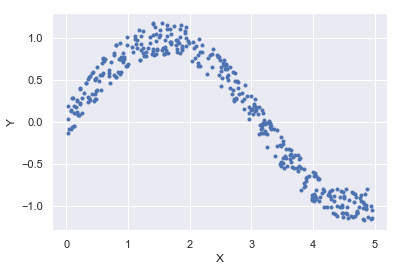

In [36]:
from IPython import display
from sklearn.externals.six import StringIO
import numpy as np
from matplotlib import pylab as plt
 
# Create a random dataset
rng = np.random.RandomState(42) # fix the seed so the result are stable
N_points = 400
X = np.sort(5 * rng.rand(N_points, 1), axis=0)
y = np.sin(X).ravel() + .4 * (0.5 - rng.rand(N_points))

plt.plot(X, y, 'b.')
plt.xlabel('Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

*So, above is our example dataset and suppose we want fit a decision tree regressor to estimate the value of unseen data. (You don't need to know anything about decision trees at this stage. But if you want to find out more, you can read more about decision trees [here](http://scikit-learn.org/stable/modules/tree.html).) All you need to know is that max_depth is a hyperparameter of the decision tree and if we increase that hyperparameter, the tree can model more complexity in the data.*

In [37]:
from ipywidgets import interactive, IntSlider
from sklearn import tree

def train_and_plot(max_depth):
    est = tree.DecisionTreeRegressor(max_depth=max_depth)
    est.fit(X, y)

    plt.plot(X, y, 'b.', label='data')
    line = plt.plot(X, est.predict(X), 'r-', label='model')
    plt.setp(line, linewidth=3.)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper right');
    plt.show()
    
max_depth_slider=IntSlider(min=1,max=8,step=1,value=2)
interactive(train_and_plot, max_depth=max_depth_slider)

interactive(children=(IntSlider(value=2, description='max_depth', max=8, min=1), Output()), _dom_classes=('wid…

**Exercise:** Try playing around with `max_depth` in the above above cell. What happens when you set it to `max_depth = 2`.  Does the fitted model look better or worse?  What about `4` or `8`?  We can tell (visually) that `max_depth = 2` is *underfitting* and `max_depth = 8` is *overfitting*. But how can we do this computationally?

#### In-sample (Training) error
*Naively, you might think that we could just measure the error of the model and choose the model with the best error.  For example, let's define the error as the mean squared error (MSE).  Let's try that below:*

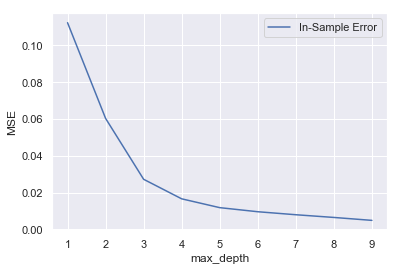

In [38]:
from sklearn import metrics

max_depths = range(1, 10)
in_sample_errors = []
for max_depth in max_depths:
    y_pred = tree.DecisionTreeRegressor(max_depth=max_depth).fit(X, y).predict(X)
    in_sample_errors.append(metrics.mean_squared_error(y, y_pred))
    
plt.plot(max_depths, in_sample_errors, label='In-Sample Error')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.legend(loc='upper right');

*We can see that the error is decreasing with the depth of the tree. Our visual inspection told us models with max_depth = 8 completely over-fit the error. It turns out that the In-Sample Error that we calculated above will always decrease with the complexity of the model (in this case, the depth of the tree). We can see from above that this leads us to overfit the data. In order to test how well our model generalizes, we need to see how it performs on new data.*

#### Out of sample (Testing) error

*One way to do this is to (randomly) split the data into training and test sets.  We train on the training set and test the resulting model on the test set.  Since the trained model never saw the test data, we can evaluate the performance on the test data.*

In [39]:
from sklearn import model_selection
from sklearn import metrics

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

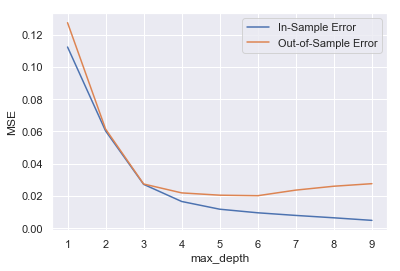

In [40]:
test_errors = []
for max_depth in max_depths:
    est = tree.DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    y_pred = est.predict(X_test)
    test_errors.append(metrics.mean_squared_error(y_test, y_pred))

plt.plot(max_depths, in_sample_errors, label='In-Sample Error')
plt.plot(max_depths, test_errors, label='Out-of-Sample Error')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.legend(loc='upper right');

This is the picture we were looking for!  The *In-Sample Error (Training)* is always decreasing but the out *Out-of-Sample Error (Testing)* initially decreases with model complexity (higher `max_depth`) but ultimately increases again.  The *Out-of-Sample Error (Testing)* is the metric to look at when evaluating overfitting.

It turns out that this is an illustration of a very general problem in machine-learning called **Bias-Variance tradeoff** (the concept is so general that it even has a [Wikipedia article](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_dilemma).  A more rigorous account can be found [here](http://www.brnt.eu/phd/node14.html)).  The tradeoff tells us that we can decompose our *Out-of-Sample Error* into

$$ \mbox{Out-of-Sample Error} = \mbox{Bias} + \mbox{Variance}. $$

The *Bias* corresponds to how far off we expect the model to deviate from reality (i.e. the model's bias) because of parametric assumptions (e.g. we forced the model to be linear or to be a tree of maximum depth 2).  It is given by the *In-Sample Error* of the above plot and always goes down with complexity.  High Bias models correspond to *underfitting*.

The *Variance* accounts for the fact that the model was only trained on a (noisy) subset of the data and that the idiosyncratic noise in the data is therefore likely to contribute some variance to the model.  The more complex we allow the model to be, the more likely we are to overfit by picking up more of this noise.  High variance models correspond to *overfitting*.

We can also think of bias as unmodeled data and variance as modeled noise.  As we increase the complexity of the model, we will necessarily model more of the data (reduce bias, reduce underfitting) but also start modeling noise (increase variance, increase overfitting).  Here's a helpful diagram of the decomposition.  Notice that at the optimal point, we have not yet learned on all our signal (still unmodeled data left) and we have picked up some noise and overfitting.

---
### 4. and 5. - Model Calibration and Evaluation

Back to the problem at hand and it's over to you... 

Split the preprocessed data and target values into a training and test data set using train_test_split. 
Then train the model of your choice and evaluate the outcome. 


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

clf1.fit(X_train, y_train)
print("model score: %.3f" % clf1.score(X_test, y_test))

model score: 0.951


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


clf2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])


clf2.fit(X_train, y_train)
print("model score: %.3f" % clf2.score(X_test, y_test))

model score: 0.933


In [42]:
# BASELINE ACCURACY FROM IMBALANCED CLASSES
(len(target) - sum(target))/len(target)

0.9379419916500854

**Questions:**
 - How accurate is the model? 
 - Is accuracy the best metric? What others can you think of? ([Hint](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c))
 - What is the baseline accuracy that your model should be compared against?
 - How might you deal with unbalanced classes in your classification problem? ([Hint](https://elitedatascience.com/imbalanced-classes))
 - Can you add a grid search to improve your model performance without overfitting? ([Hint](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#using-the-prediction-pipeline-in-a-grid-search))
 - How do other models compare to the one you made?
 - What is the best model you managed to come up with?

**Challenge:**

 - Train 4 different models and then use the output probabilities from those models as the input to a linear regression, to create your own custom ensemble model.